
# Problem 1.1

**Integrated Energy Grids**

**Problem 1.1. Analyzing solar and wind generation time series.**

:::{note}
If you have not yet set up Python on your computer, you can execute this tutorial in your browser via [Google Colab](https://colab.research.google.com/). Click on the rocket in the top right corner and launch "Colab". If that doesn't work download the `.ipynb` file and import it in [Google Colab](https://colab.research.google.com/).

Then install `pandas` and `numpy` by executing the following command in a Jupyter cell at the top of the notebook.

```sh
!pip install pandas numpy scipy
```
:::

In [1]:
import pandas as pd
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt

# Data import

In this example, wind data from [https://zenodo.org/record/3253876#.XSiVOEdS8l0](https://zenodo.org/record/3253876#.XSiVOEdS8l0) and solar PV data from [https://zenodo.org/record/2613651#.X0kbhDVS-uV](https://zenodo.org/record/3253876#.XSiVOEdS8l0) is used. The data is downloaded in csv format and saved in the 'data' folder.
The Pandas package is used as a convenient way of managing the datasets.

For convenience, the column including date information is converted into Datetime and set as index

In [2]:
data_pv = pd.read_csv('data/pv_optimal.csv',sep=';')
data_pv.index = pd.DatetimeIndex(data_pv['utc_time'])
data_wind = pd.read_csv('data/onshore_wind_1979-2017.csv',sep=';')
data_wind.index = pd.DatetimeIndex(data_wind['utc_time'])

The data format can now be analyzed using the .head() function to show the first lines of the data set

In [3]:
data_pv.head()

,utc_time,AUT,BEL,BGR,BIH,CHE,CYP,CZE,DEU,DNK,...,MLT,NLD,NOR,POL,PRT,ROU,SRB,SVK,SVN,SWE
utc_time,,,,,,,,,,,,,,,,,,,,,
1979-01-01 00:00:00+00:00,1979-01-01T00:00:00Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1979-01-01 01:00:00+00:00,1979-01-01T01:00:00Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1979-01-01 02:00:00+00:00,1979-01-01T02:00:00Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1979-01-01 03:00:00+00:00,1979-01-01T03:00:00Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1979-01-01 04:00:00+00:00,1979-01-01T04:00:00Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will use Denmark as an example for this solution

In [4]:
country = 'DNK'

**1) Start by plotting the capacity factors for wind and solar throughout the first two weeks in January and the first two weeks in July. Do this for the most recent year for which you have available data.**


<Axes: xlabel='utc_time', ylabel='Capacity Factor solar PV'>

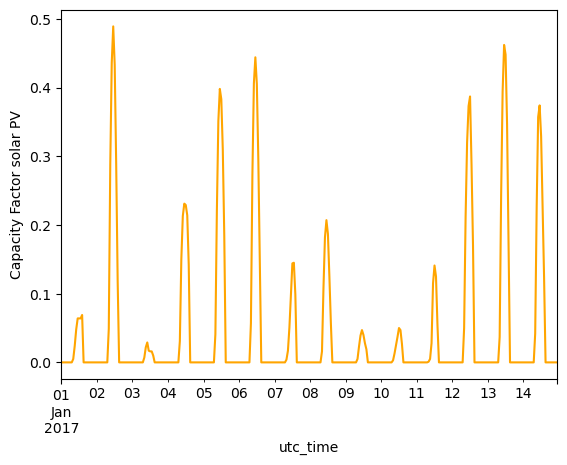

In [5]:
data_pv.loc['2017-01-01':'2017-01-14'][country].plot(kind='line', ylabel='Capacity Factor solar PV', color='orange')

<Axes: xlabel='utc_time', ylabel='Capacity Factor solar PV'>

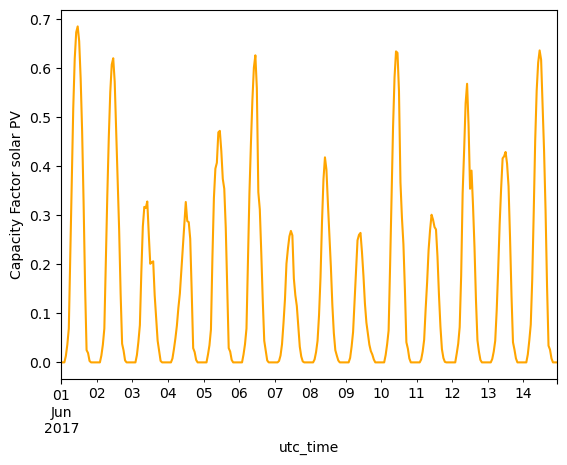

In [6]:
data_pv.loc['2017-06-01':'2017-06-14'][country].plot(kind='line', ylabel='Capacity Factor solar PV', color='orange')

<Axes: xlabel='utc_time', ylabel='Capacity Factor Onshore Wind'>

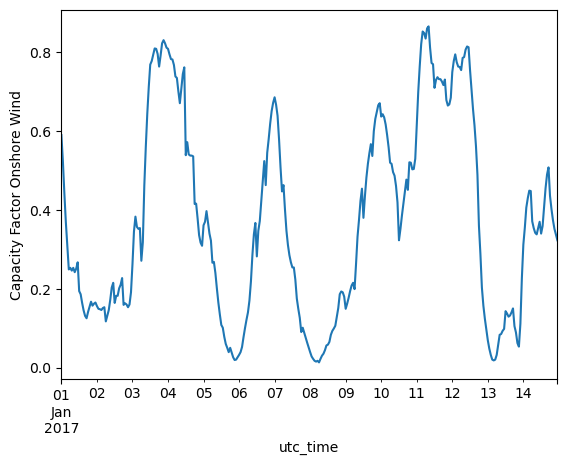

In [7]:
data_wind.loc['2017-01-01':'2017-01-14'][country].plot(kind='line', ylabel='Capacity Factor Onshore Wind')

<Axes: xlabel='utc_time', ylabel='Capacity Factor Onshore Wind'>

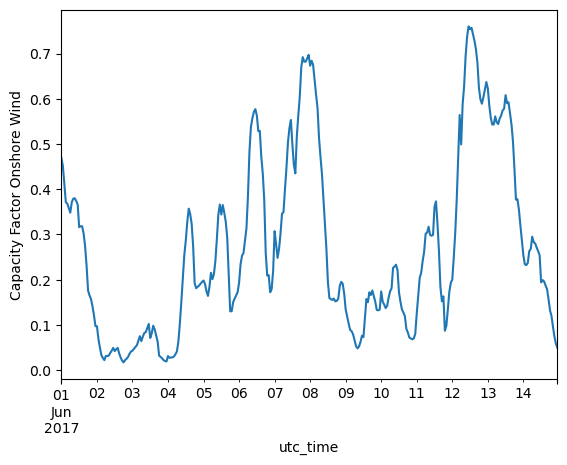

In [8]:
data_wind.loc['2017-06-01':'2017-06-14'][country].plot(kind='line', ylabel='Capacity Factor Onshore Wind')

**2)Calculate the average capacity factor for every day of the year and plot them. Do the same for capacity factors averaged by week and month. Based on steps 1 and 2, what are the dominant frequencies for every technology?**

Daily, weekly and monthly means are calculated using the pandas .groupby function combined with the pandas.Grouper automaticly creationg groups with the desired size.

In [9]:
# Daily
daily_mean_pv = data_pv.loc['2017-01-01':'2017-12-31'][country].resample('D').mean()
daily_mean_wind = data_wind.loc['2017-01-01':'2017-12-31'][country].resample('D').mean()
# Weekly
weekly_mean_pv = data_pv.loc['2017-01-01':'2017-12-31'][country].resample('W').mean()
weekly_mean_wind = data_wind.loc['2017-01-01':'2017-12-31'][country].resample('W').mean()
# Monthly
monthly_mean_pv = data_pv.loc['2017-01-01':'2017-12-31'][country].resample('ME').mean()
monthly_mean_wind = data_wind.loc['2017-01-01':'2017-12-31'][country].resample('ME').mean()

<Axes: xlabel='utc_time', ylabel='Capacity Factor solar PV'>

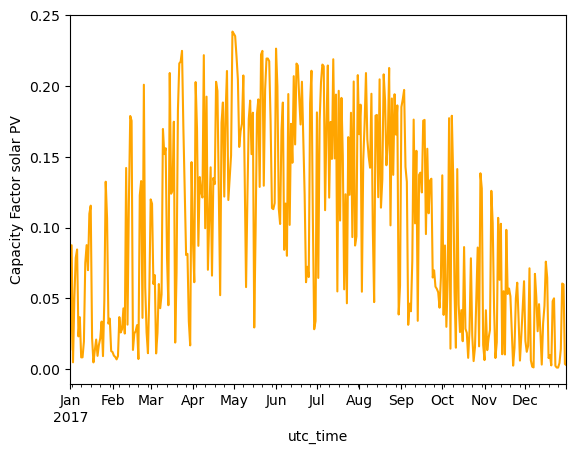

In [10]:
daily_mean_pv.plot(kind='line', ylabel='Capacity Factor solar PV', color='orange')

<Axes: xlabel='utc_time', ylabel='Capacity Factor solar PV'>

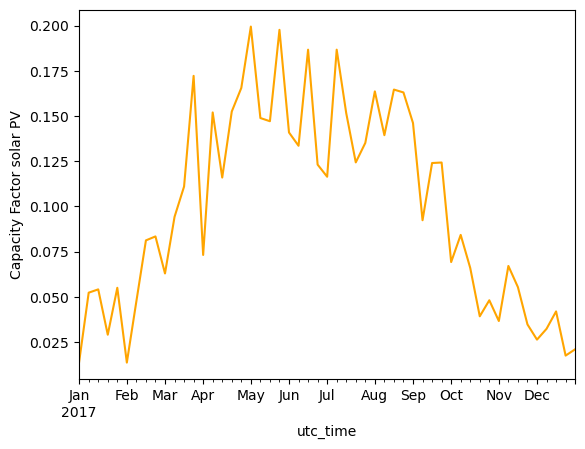

In [11]:
weekly_mean_pv.plot(kind='line', ylabel='Capacity Factor solar PV', color='orange')

<Axes: xlabel='utc_time', ylabel='Capacity Factor solar PV'>

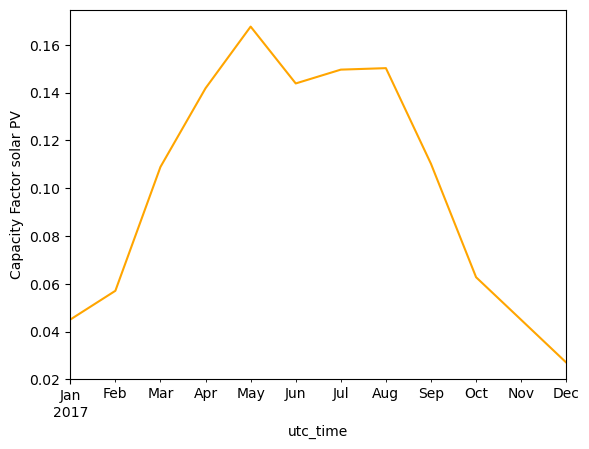

In [12]:
monthly_mean_pv.plot(kind='line', ylabel='Capacity Factor solar PV', color='orange')

<Axes: xlabel='utc_time', ylabel='Capacity Factor onshore wind'>

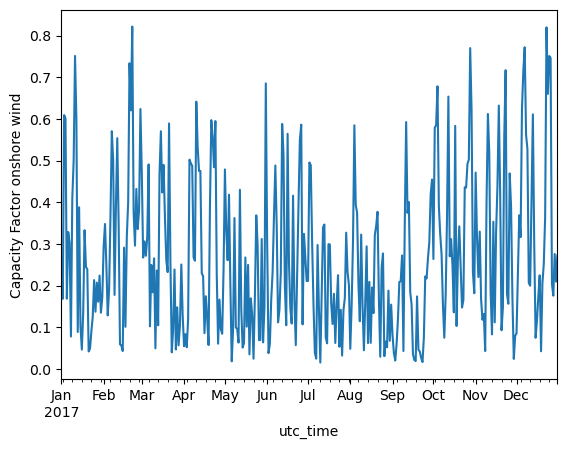

In [13]:
daily_mean_wind.plot(kind='line', ylabel='Capacity Factor onshore wind')

<Axes: xlabel='utc_time', ylabel='Capacity Factor onshore wind'>

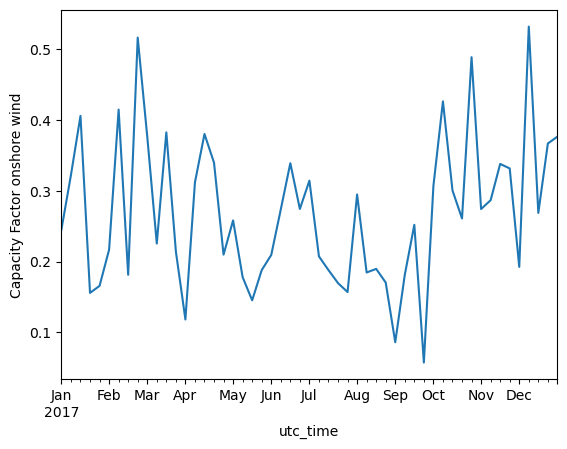

In [14]:
weekly_mean_wind.plot(kind='line', ylabel='Capacity Factor onshore wind')

<Axes: xlabel='utc_time', ylabel='Capacity Factor onshore wind'>

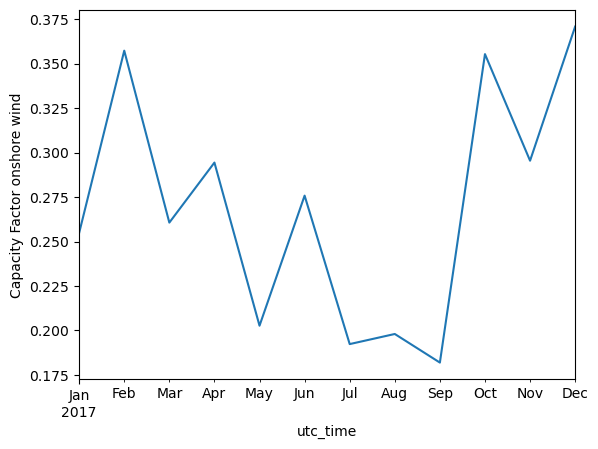

In [15]:
monthly_mean_wind.plot(kind='line', ylabel='Capacity Factor onshore wind')

Based on the figures shown above the following trends are seen:
- Solar PV has a clear daily pattern seen on the capacity factor plot for the first two weeks of the year. High capacity factors are seen in the middle of the day and zero at night.
- Solar PV furthermore, has a clearly seasonal pattern, with high capacity factors in summer, and lower in winter.
- Analyzing the daily average capacity factor of wind, fluctuations showing approximately a weekly period are seen.
- A slightly seasonal pattern is also seen for wind, with more wind in the winter and less in the summer.

**3)One useful way of investigating the previous question is by calculating the Fast Fourier Transform (FTT) power spectra of the time series. Do so and plot the power spectra for wind and solar capacity factor time series. Are these results in agreement with Sections 1 and 2?**

The function fft.fft() is used to calculate the Fast Fourier Transform $a_{\omega}=\int^T_0 X(t) e^{i \omega t}dt$ where $X(t)$ is the time series (wind or solar) that we are analyzing.

The power spectra $\| a_{\omega}\|^2$ is plotted to identify the dominant frequencies.

In [16]:
t_sampling=1 # sampling rate, 1 data per hour
x = np.arange(1,8761, t_sampling) 
y = data_pv.loc['2017-01-01':'2017-12-31'][country]
n = len(x)
y_fft = np.fft.fft(y)/n #n for normalization    
frq = np.arange(0,1/t_sampling,1/(t_sampling*n))        
period = np.array([1/f for f in frq]) 

/var/folders/zg/by4_k0616s98pw41wld9475c0000gp/T/ipykernel_30247/3780475453.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  period = np.array([1/f for f in frq])


We plot the power spectra as a function of the period (1/frequency).

Text(740, 0.95, 'month')

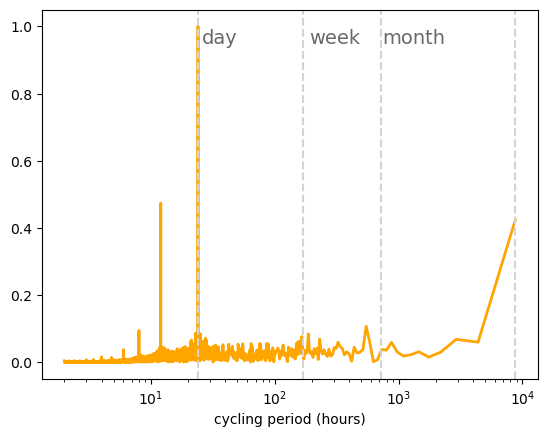

In [17]:
plt.semilogx(period[1:n//2],
             abs(y_fft[1:n//2])/np.max(abs(y_fft[1:n//2])), 
             color='orange',
             linewidth=2)  
plt.xlabel('cycling period (hours)')

#We add lines indicating day, week, month 
plt.axvline(x=24, color='lightgrey', linestyle='--')
plt.axvline(x=24*7, color='lightgrey', linestyle='--')
plt.axvline(x=24*30, color='lightgrey', linestyle='--')
plt.axvline(x=8760, color='lightgrey', linestyle='--') 
plt.text(26, 0.95, 'day', horizontalalignment='left', color='dimgrey', fontsize=14)
plt.text(24*7+20, 0.95, 'week', horizontalalignment='left', color='dimgrey', fontsize=14)
plt.text(24*30+20, 0.95, 'month', horizontalalignment='left', color='dimgrey', fontsize=14)

In [18]:
t_sampling=1 # sampling rate, 1 data per hour
x = np.arange(1,8761, t_sampling) 
y = data_wind.loc['2017-01-01':'2017-12-31'][country]
n = len(x)
y_fft = np.fft.fft(y)/n #n for normalization    
frq = np.arange(0,1/t_sampling,1/(t_sampling*n))        
period = np.array([1/f for f in frq]) 

/var/folders/zg/by4_k0616s98pw41wld9475c0000gp/T/ipykernel_30247/2483825668.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  period = np.array([1/f for f in frq])


Text(740, 0.95, 'month')

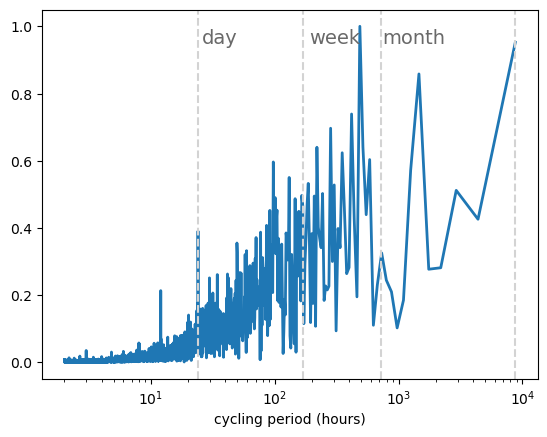

In [19]:
plt.semilogx(period[1:n//2],
             abs(y_fft[1:n//2])/np.max(abs(y_fft[1:n//2])), 
             linewidth=2)  
plt.xlabel('cycling period (hours)')

#We add lines indicating day, week, month 
plt.axvline(x=24, color='lightgrey', linestyle='--')
plt.axvline(x=24*7, color='lightgrey', linestyle='--')
plt.axvline(x=24*30, color='lightgrey', linestyle='--')
plt.axvline(x=8760, color='lightgrey', linestyle='--') 
plt.text(26, 0.95, 'day', horizontalalignment='left', color='dimgrey', fontsize=14)
plt.text(24*7+20, 0.95, 'week', horizontalalignment='left', color='dimgrey', fontsize=14)
plt.text(24*30+20, 0.95, 'month', horizontalalignment='left', color='dimgrey', fontsize=14)

Solar PV main fluctuations show a daily cycle, while onshore wind shows significant fluctuations in the synoptic timescale (with a frequency of around one week)

**4)Plot the duration curve (sorted capacity factors values) for every technology. What percentage of the potential wind and solar energy will be lost if the potential generation is curtailed for the 100 hours with the highest capacity factors? What about if curtailment affects the 1000 hours with the highest capacity factors?**

### Solar PV

<Axes: ylabel='Capacity Factor solar PV'>

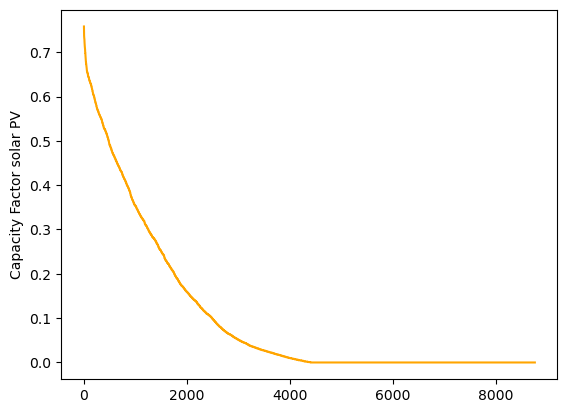

In [20]:
duration_pv = data_pv.loc['2017-01-01':'2017-12-31'][country].sort_values(ascending=False,ignore_index=True)
duration_pv.plot(kind='line', ylabel='Capacity Factor solar PV', color='orange')

In [21]:
def curtailment_loss(duration_data, hours):
    full_load_hours_per_year = sum(duration_data)
    curtailment_loss = sum(duration_data[:hours])/full_load_hours_per_year
    print('{:.1f} % annual production is lost if the {} hours with highest capacity factor are curtailed'.format(curtailment_loss*100,hours))

In [22]:
print('PV curtailment loss')
curtailment_loss(duration_pv,10)
curtailment_loss(duration_pv,100)

PV curtailment loss
0.8 % annual production is lost if the 10 hours with highest capacity factor are curtailed
7.6 % annual production is lost if the 100 hours with highest capacity factor are curtailed


### Onshore wind

<Axes: ylabel='Capacity Factor onshore wind'>

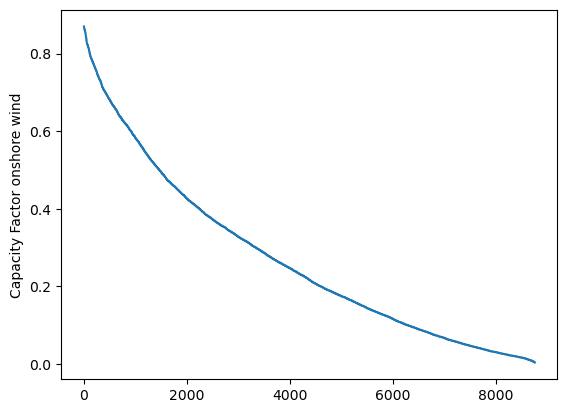

In [23]:
duration_wind = data_wind.loc['2017-01-01':'2017-12-31'][country].sort_values(ascending=False,ignore_index=True)
duration_wind.plot(kind='line', ylabel='Capacity Factor onshore wind')

In [24]:
print('Wind curtailment loss')
curtailment_loss(duration_wind,100)
curtailment_loss(duration_wind,1000)

Wind curtailment loss
3.5 % annual production is lost if the 100 hours with highest capacity factor are curtailed
29.4 % annual production is lost if the 1000 hours with highest capacity factor are curtailed


The duration curves for solar and wind are fundamentally different. Solar PV includes more than 4000 hours of zero capacity factors (the nights!) and the maximum capacity factor is 0.7 (It is very difficult for the entire Denmark to have a clear sky simultaneously). Wind duration curve includes a very low number of hours with zero capacity factor and a maximum of 0.9

**5) Calculate the ramps for every technology for every hour of the year. We define ramp as the difference between the capacity factor in an hour and the capacity factor in the previous hour. Plot the distribution of ramps for wind and solar. Which technology has the higher variation?**

<Axes: xlabel='ramps solar PV', ylabel='Frequency'>

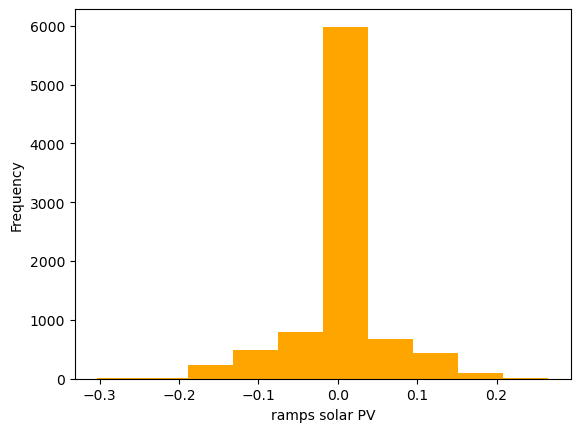

In [25]:
ramps_pv = data_pv.loc['2017-01-01':'2017-12-31'][country].diff()
ramps_pv.plot(kind='hist', xlabel='ramps solar PV', color='orange')

<Axes: xlabel='ramps wind', ylabel='Frequency'>

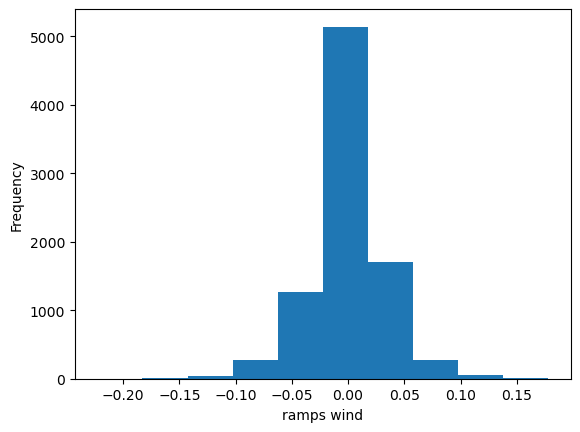

In [26]:
ramps_wind = data_wind.loc['2017-01-01':'2017-12-31'][country].diff()
ramps_wind.plot(kind='hist', xlabel='ramps wind')

**Let’s look now at the interannual variability. For every technology, calculate the annual average capacity factor for the most recent year for which you have data. Then, calculate the annual capacity factor for every year for which you have data. Estimate the average value for all the years and the year-to-year variance.**

### Solar PV

<Axes: xlabel='utc_time', ylabel='Capacity Factor solar PV'>

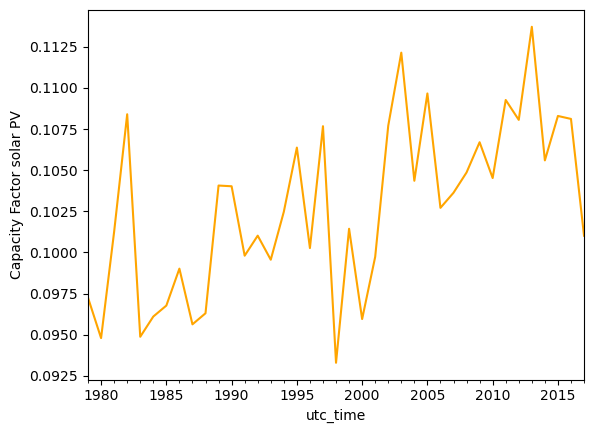

In [27]:
annual_mean_pv = data_pv[country].resample('YE').mean()
annual_mean_pv.plot(kind='line', ylabel='Capacity Factor solar PV', color='orange')

In [28]:
print('Average annual mean {:.2f}, \nNormalized Standar deviation {:.2f} %'.format(annual_mean_pv.mean(),annual_mean_pv.std()/annual_mean_pv.mean()))

Average annual mean 0.10, 
Normalized Standar deviation 0.05 %


### Onshore wind

<Axes: xlabel='utc_time', ylabel='Capacity Factor onshore wind'>

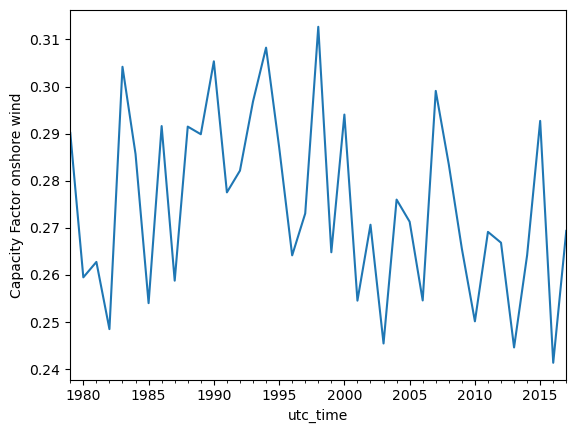

In [29]:
annual_mean_wind = data_wind[country].resample('YE').mean()
annual_mean_wind.plot(kind='line', ylabel='Capacity Factor onshore wind')

In [30]:
print('Average annual mean {:.2f}, \nNormalized Standar deviation {:.2f} %'.format(annual_mean_wind.mean(),annual_mean_wind.std()/annual_mean_wind.mean()))

Average annual mean 0.27, 
Normalized Standar deviation 0.07 %


**Repeat steps 1 to 5 for the electricity and heating demand time series.** 

### Data import

In [31]:
data_el = pd.read_csv('data/electricity_demand.csv',sep=';')
data_el.index = pd.DatetimeIndex(data_el['utc_time'])
data_heat = pd.read_csv('data/heat_demand.csv',sep=';')
data_heat.index = pd.DatetimeIndex(data_heat['utc_time'])

### 1) Plot of demand throughout two weeks

<Axes: xlabel='utc_time', ylabel='Electricity demand'>

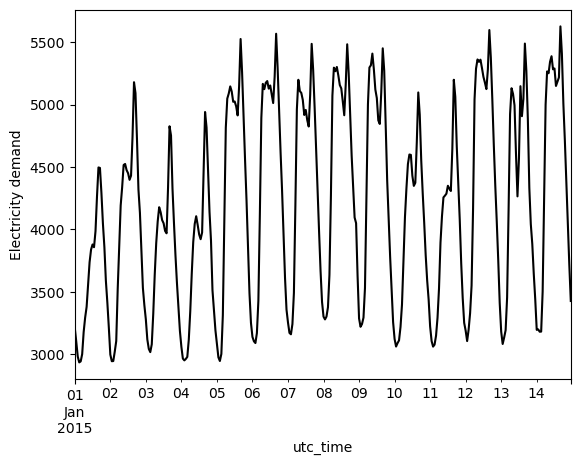

In [32]:
data_el.loc['2015-01-01':'2015-01-14'][country].plot(kind='line', ylabel='Electricity demand', color='black')

<Axes: xlabel='utc_time', ylabel='Electricity demand'>

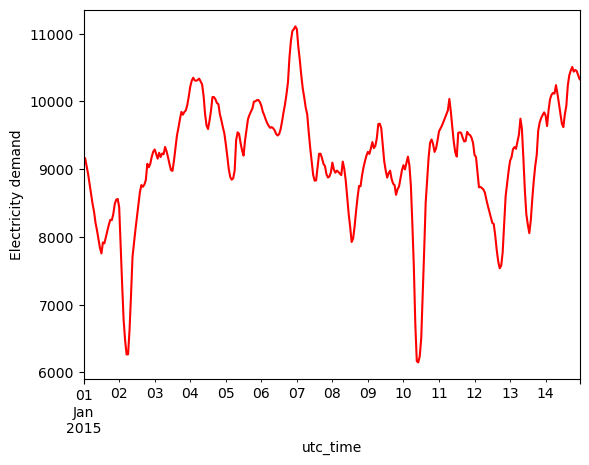

In [33]:
data_heat.loc['2015-01-01':'2015-01-14'][country].plot(kind='line', ylabel='Electricity demand', color='red')

In [34]:
### 1) Plot of daily, weekly, annual demand

In [35]:
# Daily
daily_mean_el = data_el.loc['2015-01-01':'2015-12-31'][country].resample('D').mean()
daily_mean_heat = data_heat.loc['2015-01-01':'2015-12-31'][country].resample('D').mean()
# Weekly
weekly_mean_el = data_el.loc['2015-01-01':'2015-12-31'][country].resample('W').mean()
weekly_mean_heat = data_heat.loc['2015-01-01':'2015-12-31'][country].resample('W').mean()
# Monthly
monthly_mean_el = data_el.loc['2015-01-01':'2015-12-31'][country].resample('ME').mean()
monthly_mean_heat = data_heat.loc['2015-01-01':'2015-12-31'][country].resample('ME').mean()

<Axes: xlabel='utc_time', ylabel='demand'>

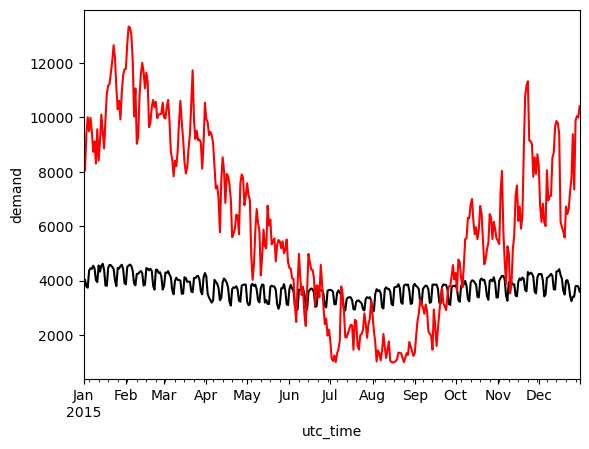

In [36]:
daily_mean_el.plot(kind='line', ylabel='demand', color='black')
daily_mean_heat.plot(kind='line', color='red')

<Axes: xlabel='utc_time', ylabel='demand'>

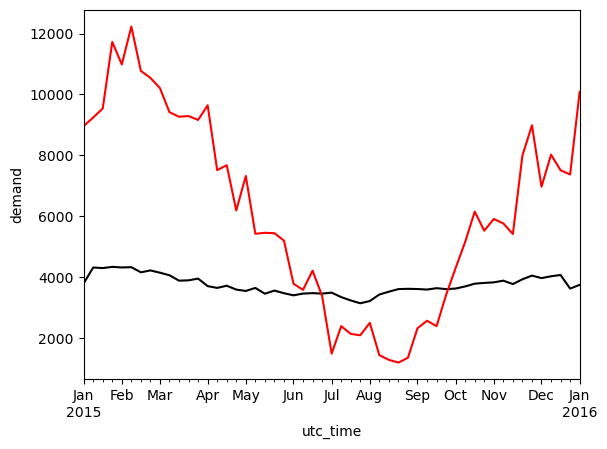

In [37]:
weekly_mean_el.plot(kind='line', ylabel='demand', color='black')
weekly_mean_heat.plot(kind='line', color='red')

<Axes: xlabel='utc_time', ylabel='demand'>

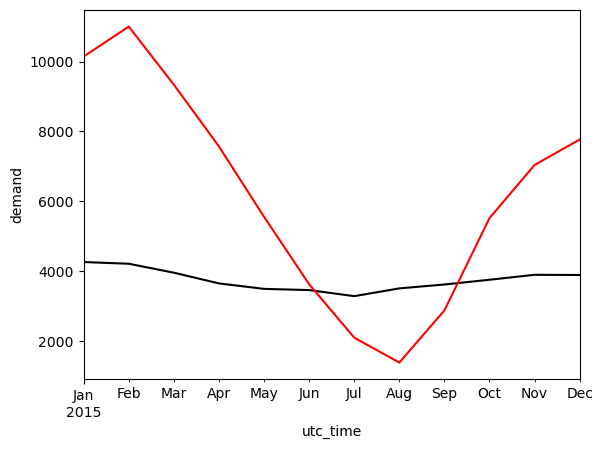

In [38]:
monthly_mean_el.plot(kind='line', ylabel='demand', color='black')
monthly_mean_heat.plot(kind='line', color='red')

### Fast Fourier power spectra

/var/folders/zg/by4_k0616s98pw41wld9475c0000gp/T/ipykernel_30247/1496012896.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  period = np.array([1/f for f in frq])


Text(740, 0.95, 'month')

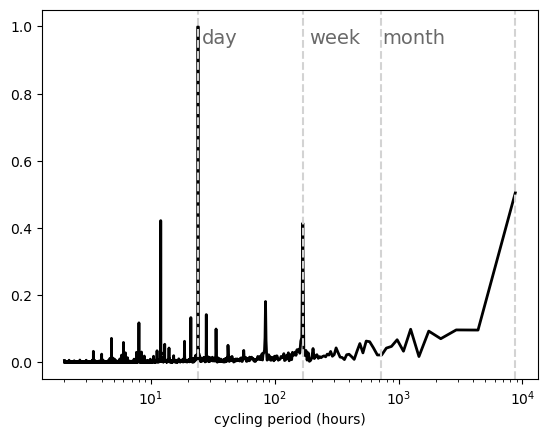

In [39]:
t_sampling=1 # sampling rate, 1 data per hour
x = np.arange(1,8761, t_sampling) 
y = data_el.loc['2015-01-01':'2015-12-31'][country]
n = len(x)
y_fft = np.fft.fft(y)/n #n for normalization    
frq = np.arange(0,1/t_sampling,1/(t_sampling*n))        
period = np.array([1/f for f in frq]) 

plt.semilogx(period[1:n//2],
             abs(y_fft[1:n//2])/np.max(abs(y_fft[1:n//2])), 
             color='black',
             linewidth=2)  
plt.xlabel('cycling period (hours)')

#We add lines indicating day, week, month 
plt.axvline(x=24, color='lightgrey', linestyle='--')
plt.axvline(x=24*7, color='lightgrey', linestyle='--')
plt.axvline(x=24*30, color='lightgrey', linestyle='--')
plt.axvline(x=8760, color='lightgrey', linestyle='--') 
plt.text(26, 0.95, 'day', horizontalalignment='left', color='dimgrey', fontsize=14)
plt.text(24*7+20, 0.95, 'week', horizontalalignment='left', color='dimgrey', fontsize=14)
plt.text(24*30+20, 0.95, 'month', horizontalalignment='left', color='dimgrey', fontsize=14)

/var/folders/zg/by4_k0616s98pw41wld9475c0000gp/T/ipykernel_30247/3748597511.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  period = np.array([1/f for f in frq])


Text(740, 0.95, 'month')

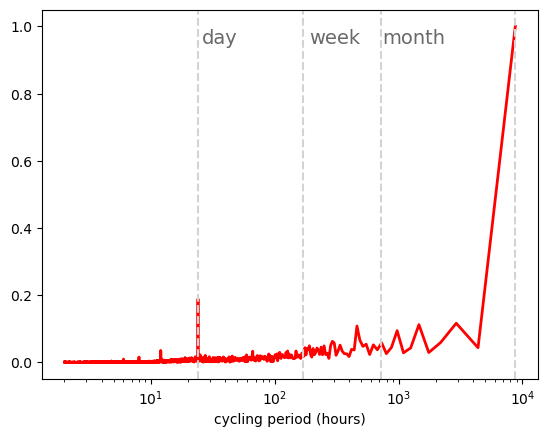

In [40]:
t_sampling=1 # sampling rate, 1 data per hour
x = np.arange(1,8761, t_sampling) 
y = data_heat.loc['2015-01-01':'2015-12-31'][country]
n = len(x)
y_fft = np.fft.fft(y)/n #n for normalization    
frq = np.arange(0,1/t_sampling,1/(t_sampling*n))        
period = np.array([1/f for f in frq]) 

plt.semilogx(period[1:n//2],
             abs(y_fft[1:n//2])/np.max(abs(y_fft[1:n//2])), 
             color='red',
             linewidth=2)  
plt.xlabel('cycling period (hours)')

#We add lines indicating day, week, month 
plt.axvline(x=24, color='lightgrey', linestyle='--')
plt.axvline(x=24*7, color='lightgrey', linestyle='--')
plt.axvline(x=24*30, color='lightgrey', linestyle='--')
plt.axvline(x=8760, color='lightgrey', linestyle='--') 
plt.text(26, 0.95, 'day', horizontalalignment='left', color='dimgrey', fontsize=14)
plt.text(24*7+20, 0.95, 'week', horizontalalignment='left', color='dimgrey', fontsize=14)
plt.text(24*30+20, 0.95, 'month', horizontalalignment='left', color='dimgrey', fontsize=14)

### Duration curves

<Axes: ylabel='demand'>

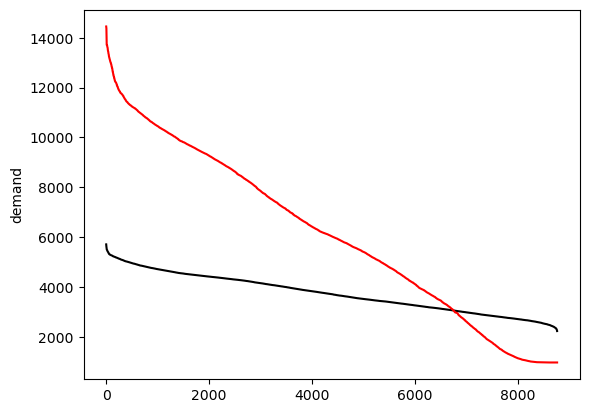

In [41]:
duration_el = data_el.loc['2015-01-01':'2015-12-31'][country].sort_values(ascending=False,ignore_index=True)
duration_heat = data_heat.loc['2015-01-01':'2015-12-31'][country].sort_values(ascending=False,ignore_index=True)
duration_el.plot(kind='line', ylabel='demand', color='black')
duration_heat.plot(kind='line', ylabel='demand', color='red')

### Ramps

<Axes: xlabel='electricity demand ramps (MWh)', ylabel='Frequency'>

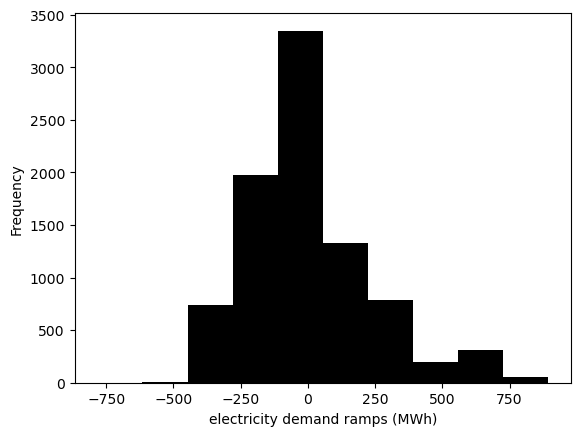

In [42]:
ramps_el = data_el.loc['2015-01-01':'2015-12-31'][country].diff()
ramps_el.plot(kind='hist', xlabel='electricity demand ramps (MWh)', color='black')

<Axes: xlabel='heating demand ramps (MWh)', ylabel='Frequency'>

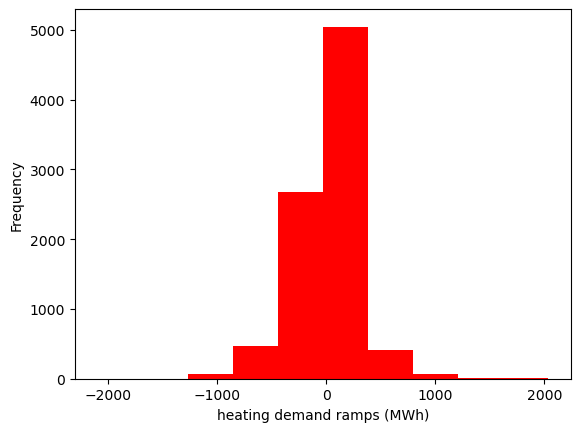

In [43]:
ramps_heat = data_heat.loc['2015-01-01':'2015-12-31'][country].diff()
ramps_heat.plot(kind='hist', xlabel='heating demand ramps (MWh)', color='red')